In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-store-customer-data/online_store_customer_data.csv
/kaggle/input/anti-dataset/anti dataset - anti dataset.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Part I

1. Importing Pandas Library:

The code starts by importing the pandas library using the alias pd. Pandas is a powerful library for data manipulation and analysis.

2. Reading a CSV File:

The pd.read_csv() function is used to read a CSV file. The file path provided ("/kaggle/input/online-store-customer-data/online_store_customer_data.csv") indicates the location of the CSV file. Make sure that the file path is correct.

3. DataFrame Creation:

The data from the CSV file is loaded into a DataFrame named df1. A DataFrame is a two-dimensional, tabular data structure provided by Pandas.

4. Displaying the DataFrame:

The last line of code simply displays the content of the DataFrame df1. When executed in a Jupyter notebook or interactive environment, the DataFrame's content is shown.

In [3]:
df1 = pd.read_csv("/kaggle/input/online-store-customer-data/online_store_customer_data.csv")
df1

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,5/1/2021,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,5/1/2021,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Gender            2484 non-null   object 
 3   Age               2470 non-null   float64
 4   Marital_status    2512 non-null   object 
 5   State_names       2512 non-null   object 
 6   Segment           2512 non-null   object 
 7   Employees_status  2486 non-null   object 
 8   Payment_method    2512 non-null   object 
 9   Referal           2357 non-null   float64
 10  Amount_spent      2270 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 216.0+ KB


Before we make any changes, we are going to duplicate the dataset so that original dataset is
not affected.

In [5]:
df = df1.copy()

Plotting the categorical columns to help understand the dataset better

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='Gender', ylabel='count'>

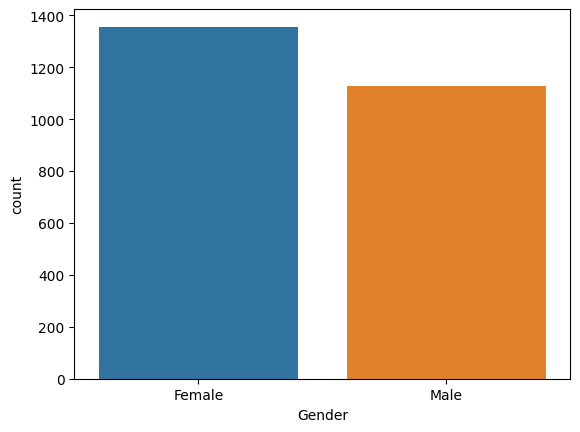

In [7]:
sns.countplot(x = "Gender", data = df)

1. Visualization:

The count plot visually represents the distribution of gender in the dataset.
The x-axis represents the unique categories in the "Gender" column.
The y-axis represents the count of occurrences for each gender.

2. Interpretation:

By observing the count plot, you can quickly assess the relative frequencies or distribution of each gender category in the dataset.
The height of each bar represents the number of occurrences of each gender.

3. Insights:

Analyzing the count plot might reveal patterns or imbalances in the gender distribution.
It's useful for exploring the composition of categorical variables and gaining insights into the dataset.

<Axes: xlabel='Segment', ylabel='count'>

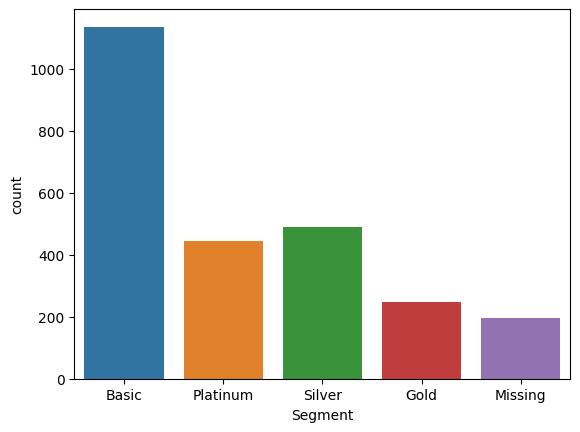

In [8]:
sns.countplot(x = "Segment", data = df)

Insight into Distribution:

By observing the heights of the bars, you can quickly assess which segments are more prevalent or less common in the dataset.
Unusual or unexpected patterns in the distribution may warrant further investigation. 
In this case, maximum people preferred "Basic" segement

<Axes: xlabel='Marital_status', ylabel='count'>

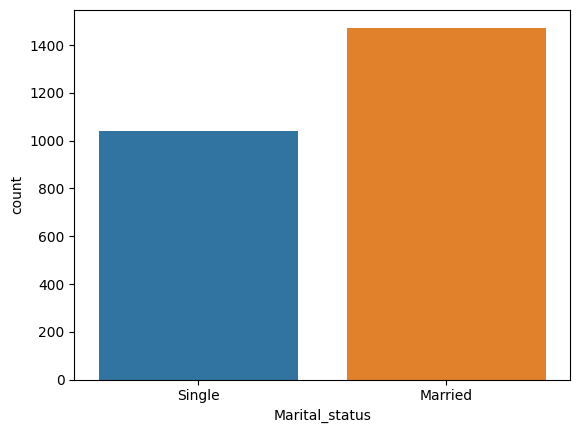

In [9]:
sns.countplot(x = "Marital_status", data = df)

Insights:

The count plot provides insights into the distribution of marital statuses within the dataset.

It can reveal which marital status categories are more prevalent or less common.

Identifying imbalances or patterns may be relevant for further analysis or decision-making.

<Axes: xlabel='Employees_status', ylabel='count'>

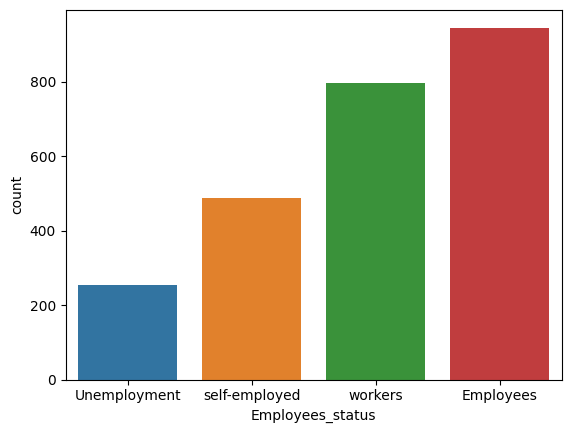

In [10]:
sns.countplot(x = "Employees_status", data = df)

Insights:

The count plot provides insights into the composition of employee status categories within the dataset.

<Axes: xlabel='Payment_method', ylabel='count'>

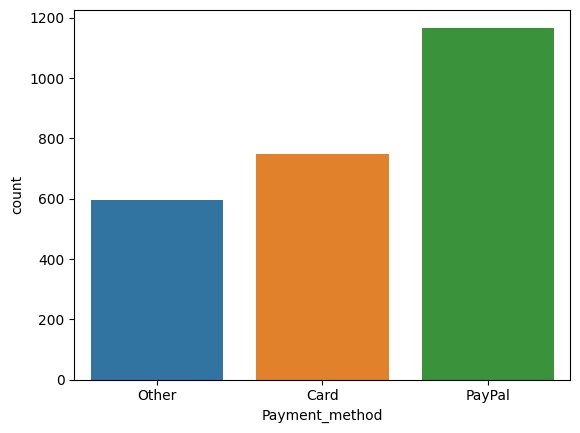

In [11]:
sns.countplot(x = "Payment_method", data = df)

1. Interpretation:

By examining the count plot, one can quickly understand the popularity or prevalence of different payment methods within the dataset.
The height of each bar indicates the number of occurrences of a particular payment method.

2. Insights:

The count plot can reveal which payment methods are more commonly used or preferred by the dataset.
It can highlight any significant imbalances or patterns in the distribution of payment methods.


Providing a summary statistics (mean, median,
minimum, maximum, standard deviation) for a
dataset (age, income etc.) with numeric variables grouped by one of the
qualitative (categorical) variable.

For example, if your categorical variable is age groups and quantitative variable
is Payment_method, then provide summary
statistics of Payment_method grouped by the
age groups.

In [12]:
df.groupby("Gender")['Age'].mean()

Gender
Female    46.864253
Male      46.475806
Name: Age, dtype: float64

In [13]:
df.groupby("Gender")['Age'].median()

Gender
Female    47.0
Male      47.0
Name: Age, dtype: float64

In [14]:
df.groupby("Gender")['Age'].min()

Gender
Female    15.0
Male      15.0
Name: Age, dtype: float64

In [15]:
df.groupby("Segment")['Age'].mean()

Segment
Basic       47.093107
Gold        47.334711
Missing     47.430052
Platinum    45.680365
Silver      45.781250
Name: Age, dtype: float64

In [16]:
df.groupby("Segment")['Age'].max()

Segment
Basic       78.0
Gold        78.0
Missing     78.0
Platinum    78.0
Silver      78.0
Name: Age, dtype: float64

In [17]:
df.groupby("Marital_status")['Age'].mean()

Marital_status
Married    46.459889
Single     46.888672
Name: Age, dtype: float64

In [18]:
df.groupby("Marital_status")['Age'].median()

Marital_status
Married    47.0
Single     46.5
Name: Age, dtype: float64

In [19]:
df.groupby("Marital_status")['Age'].min()

Marital_status
Married    15.0
Single     15.0
Name: Age, dtype: float64

In [20]:
df.groupby("Marital_status")['Age'].std()

Marital_status
Married    18.268948
Single     18.074823
Name: Age, dtype: float64

In [21]:
df.groupby("Employees_status")['Amount_spent'].std()

Employees_status
Employees        900.935463
Unemployment     848.689156
self-employed    888.974074
workers          854.835555
Name: Amount_spent, dtype: float64

In [22]:
df.groupby("Employees_status")['Age'].std()

Employees_status
Employees        18.229019
Unemployment     17.502303
self-employed    18.372993
workers          18.194628
Name: Age, dtype: float64

In [23]:
df.groupby("Employees_status")['Amount_spent'].max()

Employees_status
Employees        2997.21
Unemployment     2951.27
self-employed    2998.62
workers          2999.98
Name: Amount_spent, dtype: float64

In [24]:
df.groupby("Payment_method")['Amount_spent'].std()

Payment_method
Card      862.425415
Other     867.918732
PayPal    894.171343
Name: Amount_spent, dtype: float64

In [25]:
df.groupby("Payment_method")['Age'].mean()

Payment_method
Card      46.108992
Other     47.454082
PayPal    46.557491
Name: Age, dtype: float64

In [26]:
df.groupby("Payment_method")['Age'].median()

Payment_method
Card      45.0
Other     48.5
PayPal    47.0
Name: Age, dtype: float64

In [27]:
df.groupby("Payment_method")['Age'].min()

Payment_method
Card      15.0
Other     15.0
PayPal    15.0
Name: Age, dtype: float64

In [28]:
df.groupby("Marital_status")['Amount_spent'].mean()

Marital_status
Married    1414.961412
Single     1423.328658
Name: Amount_spent, dtype: float64

In [29]:
df.groupby("Marital_status")['Amount_spent'].max()

Marital_status
Married    2999.98
Single     2997.21
Name: Amount_spent, dtype: float64

## Part II



The research center asked Dr. Han’s data mining lab to analyze the result. They asked how to use the two
medicines to fight with V1-virus.

In [30]:
df1 = pd.read_csv("/kaggle/input/anti-dataset/anti dataset - anti dataset.csv", index_col = 'Unnamed: 0')
df1

,ANTI_A,ANTI_B,V1
0,2.77,98.1,6.0
1,9.79,16.8,6.7
2,9.29,13.6,7.5
3,3.41,1.6,7.6
4,9.83,55.3,8.4
5,5.76,94.4,9.3
6,2.73,67.2,9.4
7,0.17,41.9,9.6
8,7.50,22.7,10.6
9,0.21,39.6,11.2


Before we make any changes, we are going to duplicate the dataset so that original dataset is
not affected.

In [31]:
df = df1.copy()

1. Take the V1-Virus measures of the above 40 records and partition them into 5 bins by each of the
following methods

a. Equal-width partitioning

In [32]:
# Apply equal-width partitioning using pd.cut() and add a new column for bin assignment
df['V1_bins'] = pd.cut(df['V1'], bins=5, labels=False)
df

,ANTI_A,ANTI_B,V1,V1_bins
0,2.77,98.1,6.0,0
1,9.79,16.8,6.7,0
2,9.29,13.6,7.5,0
3,3.41,1.6,7.6,0
4,9.83,55.3,8.4,0
5,5.76,94.4,9.3,0
6,2.73,67.2,9.4,0
7,0.17,41.9,9.6,0
8,7.50,22.7,10.6,0
9,0.21,39.6,11.2,0


In [33]:
# Calculate mean for each bin
df.groupby('V1_bins').mean()

,ANTI_A,ANTI_B,V1
V1_bins,,,
0,5.307826,48.495652,11.952174
2,7.790000,61.400000,55.500000
3,3.816250,41.487500,65.725000
4,5.531250,59.300000,80.300000


b. Equal-depth (equal-frequency) partitioning

In [34]:
# Apply equal-depth partitioning using pd.qcut() and count the number of records in each bin
df['bins_depth'] = pd.qcut(df['V1'], q=5, labels=False)

In [35]:
df

,ANTI_A,ANTI_B,V1,V1_bins,bins_depth
0,2.77,98.1,6.0,0,0
1,9.79,16.8,6.7,0,0
2,9.29,13.6,7.5,0,0
3,3.41,1.6,7.6,0,0
4,9.83,55.3,8.4,0,0
5,5.76,94.4,9.3,0,0
6,2.73,67.2,9.4,0,0
7,0.17,41.9,9.6,0,0
8,7.50,22.7,10.6,0,1
9,0.21,39.6,11.2,0,1


2. Separate the 40 patients into two groups based on the analysis 1 (partitioning), where one group
has much lower V1-virus than the other, and further analyze the two groups by the following
methods

a. Compute the mean, Q1, median, Q3, and standard deviation of the T-virus measures for
each group

In [36]:
# Separate patients into two groups based on V1_bins
group_low_v1 = df[df['V1_bins'] <= 1]  # Group with V1_bins <= 1
group_high_v1 = df[df['V1_bins'] > 1]  # Group with V1_bins > 1

# Compute summary statistics for each group
group_low_v1_stats = group_low_v1['V1'].describe()
group_high_v1_stats = group_high_v1['V1'].describe()
group_low_v1_stats

count    23.000000
mean     11.952174
std       3.830840
min       6.000000
25%       9.350000
50%      11.500000
75%      14.500000
max      21.400000
Name: V1, dtype: float64

In [37]:
group_high_v1_stats

count    17.000000
mean     71.982353
std       9.593112
min      55.500000
25%      64.900000
50%      73.400000
75%      77.900000
max      90.700000
Name: V1, dtype: float64

b. Draw the boxplots of the T-virus measures for each group

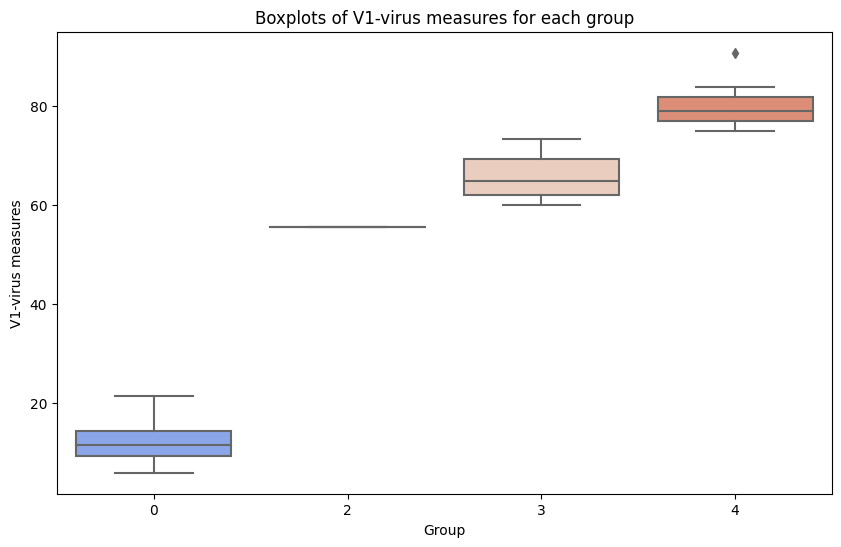

In [38]:
# Draw boxplots for each group
plt.figure(figsize=(10, 6))
sns.boxplot(x='V1_bins', y='V1', data=df, palette='coolwarm')
plt.title('Boxplots of V1-virus measures for each group')
plt.xlabel('Group')
plt.ylabel('V1-virus measures')
plt.show()

c. Normalize the Anti-A and Anti-B amounts based on the min-max normalization for each
group, and write down all normalized values

In [39]:

# Define min-max normalization function
def min_max_normalization(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize 'ANTI_A' and 'ANTI_B' for each group
group_low_v1[['ANTI_A_normalized', 'ANTI_B_normalized']] = group_low_v1.groupby('bins_depth')[['ANTI_A', 'ANTI_B']].transform(min_max_normalization)

group_high_v1[['ANTI_A_normalized', 'ANTI_B_normalized']] = group_high_v1.groupby('bins_depth')[['ANTI_A', 'ANTI_B']].transform(min_max_normalization)
# Display the DataFrame with normalized values
group_low_v1[['ANTI_A_normalized', 'ANTI_B_normalized']]

,ANTI_A_normalized,ANTI_B_normalized
0,0.269151,1.000000
1,0.995859,0.157513
2,0.944099,0.124352
3,0.335404,0.000000
4,1.000000,0.556477
5,0.578675,0.961658
6,0.265010,0.679793
7,0.000000,0.417617
8,0.947984,0.092545
9,0.000000,0.309769


In [40]:
group_high_v1[['ANTI_A_normalized', 'ANTI_B_normalized']]

,ANTI_A_normalized,ANTI_B_normalized
23,NaN,NaN
24,0.518678,0.582524
25,0.000000,0.000000
26,0.114943,0.206657
27,0.116379,0.299584
28,0.964080,1.000000
29,0.159483,0.019417
30,0.788793,0.334258
31,1.000000,0.907074
32,0.835220,0.549107


d. Draw scatter plots of the normalized Anti-A and normalized Anti-B for each group

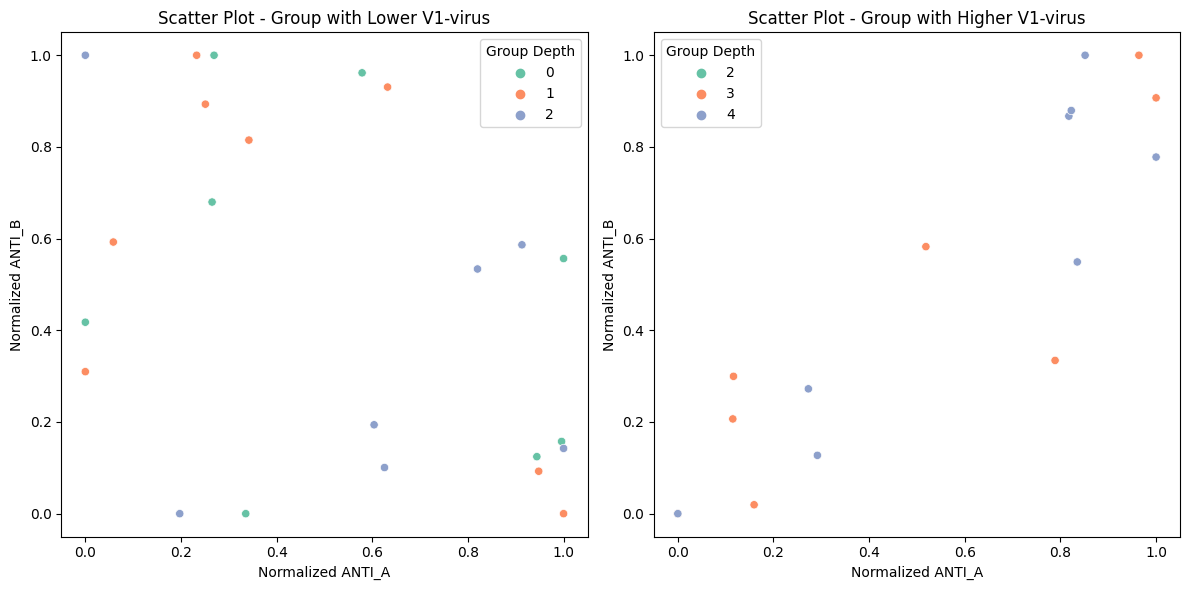

In [41]:

# Scatter plot for each group
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='ANTI_A_normalized', y='ANTI_B_normalized', data=group_low_v1, hue='bins_depth', palette='Set2')
plt.title('Scatter Plot - Group with Lower V1-virus')
plt.xlabel('Normalized ANTI_A')
plt.ylabel('Normalized ANTI_B')
plt.legend(title='Group Depth')

plt.subplot(1, 2, 2)
sns.scatterplot(x='ANTI_A_normalized', y='ANTI_B_normalized', data=group_high_v1, hue='bins_depth', palette='Set2')
plt.title('Scatter Plot - Group with Higher V1-virus')
plt.xlabel('Normalized ANTI_A')
plt.ylabel('Normalized ANTI_B')
plt.legend(title='Group Depth')

plt.tight_layout()
plt.show()

e. Calculate the Pearson correlation coefficient between the normalized Anti-A and
normalized Anti-B for each group

In [42]:
from scipy.stats import pearsonr
# Calculate Pearson correlation coefficient for each group
corr_low_v1, _ = pearsonr(group_low_v1['ANTI_A_normalized'], group_low_v1['ANTI_B_normalized'])
corr_high_v1, _ = pearsonr(group_high_v1['ANTI_A_normalized'].fillna(0.0), group_high_v1['ANTI_B_normalized'].fillna(0.0))

# Display the correlation coefficients
print("Pearson correlation coefficient for Group with Lower V1-virus:", corr_low_v1)
print("Pearson correlation coefficient for Group with Higher V1-virus:", corr_high_v1)

Pearson correlation coefficient for Group with Lower V1-virus: -0.398797164099304
Pearson correlation coefficient for Group with Higher V1-virus: 0.9100422949159421
